In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}
df = pd.read_csv('NYPD_arrest_data_2021-2023.csv', dtype=data_types)
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412713 entries, 0 to 412712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ARREST_DATE        412713 non-null  datetime64[ns]
 1   PD_DESC            412713 non-null  category      
 2   KY_CD              412713 non-null  float64       
 3   OFNS_DESC          412713 non-null  category      
 4   LAW_CODE           412713 non-null  category      
 5   LAW_CAT_CD         412713 non-null  category      
 6   ARREST_BORO        412713 non-null  category      
 7   ARREST_PRECINCT    412713 non-null  category      
 8   JURISDICTION_CODE  412713 non-null  category      
 9   AGE_GROUP          412713 non-null  category      
 10  PERP_SEX           412713 non-null  category      
 11  PERP_RACE          412713 non-null  category      
 12  Latitude           412713 non-null  float64       
 13  Longitude          412713 non-null  float64 

In [8]:
label_encoders = {}
for column in df.select_dtypes(include=['category', 'object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [11]:
features = ['ARREST_DATE', 'ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']
target = 'LAW_CAT_CD'
X = df[features]
y = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
#ARREST_DATE needs to be converted to a numerical value
X_train['ARREST_DATE'] = X_train['ARREST_DATE'].astype(np.int64)
X_test['ARREST_DATE'] = X_test['ARREST_DATE'].astype(np.int64)

X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.50      0.13      0.21     36498
           1       0.56      0.90      0.69     45384
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00       429

    accuracy                           0.55     82543
   macro avg       0.21      0.21      0.18     82543
weighted avg       0.53      0.55      0.47     82543



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is the proportion of true positive predictions among all positive predictions
Recall is the proportion of true positive predictions among all actual positives
The F1-Score is the harmonic mean of precision and recall
The performance metrics indicate a significant issue with class imbalance and model bias towards the majority class.

### Class 0: 
Accuracy: Of all the predictions only 50% were correct
Recall: Only 13% of actual Class 0 instances are correctly predicted as Class 0
F1 Score: The F1-Score of 0.21 indicates poor performance, as it balances both precision and recall

### Class 1:
Accuracy: Out of all instances predicted as Class 1, 56% are actually Class 1
Recall: The model correctly predicted this class 90% of the time
F1 Score: 69% is a reasonably high score but inconclusive due to the class imbalance

### Class 2:
The model fails to predict this correctly, indicating that it doesn't recognize this class at all

### Class 3,4, and 5:
The model fails to predict these classes correctly, indicating that it  doesn't recognize these classes at all

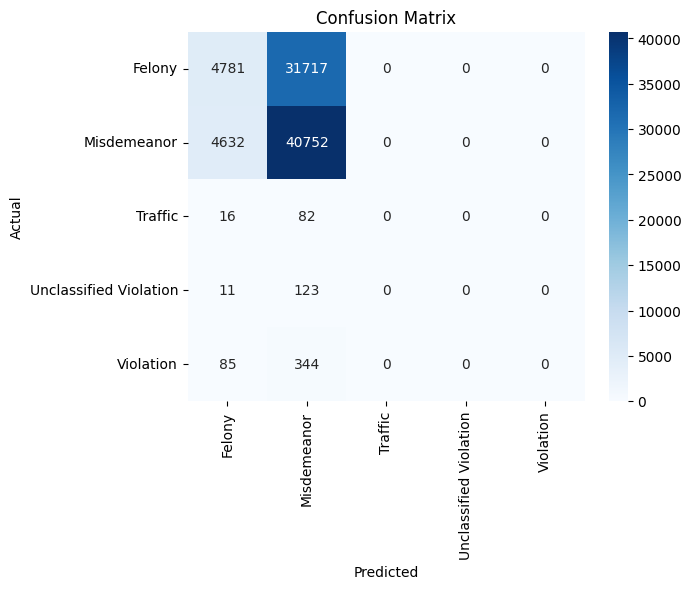

In [18]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[target].classes_, yticklabels=label_encoders[target].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
